The goal of this notebook is to take a closer look into the outputs of different LCEGP
approaches and to try to make sense of the behavior of IKG.

### This proves that IKG with LCEGP is acting stupid and evaluating same point repeatedly.

In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

current_dir = os.getcwd()



def get_output_dicts(dirname: str) -> list:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]
    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")
    return output_dicts


def plot_2d_X(X: Tensor):
    x = torch.arange(X.shape[0])
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    plt.scatter(x, X[..., 0], label="X_0")
    plt.scatter(x, X[..., 1], label="X_1")
    plt.grid()
    plt.legend()
    plt.show()

In [2]:
dirname = "config_4"

output = get_output_dicts(dirname)

Config: 
 {
    "iterations": 400,
    "fit_frequency": 10,
    "num_arms": 4,
    "num_contexts": 8,
    "batch_size": 5,
    "num_fantasies": 0
}
Read 30 output files.


In [3]:
output[2]["labels"]

['LCEGP',
 'Li',
 'Gao',
 'LCEGP_reuse',
 'ML_IKG',
 'LCEGP_PCS_apx',
 'LCEGP_Matern',
 'LCEGP_Scale',
 'ST_PCS',
 'ST_PCS_apx',
 'ST_IKG']

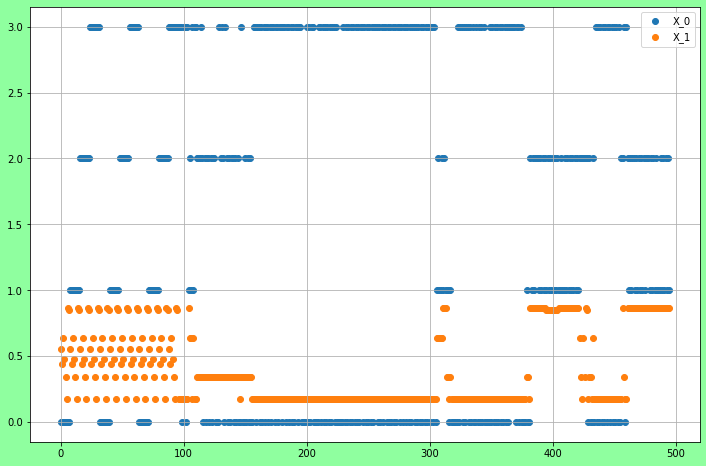

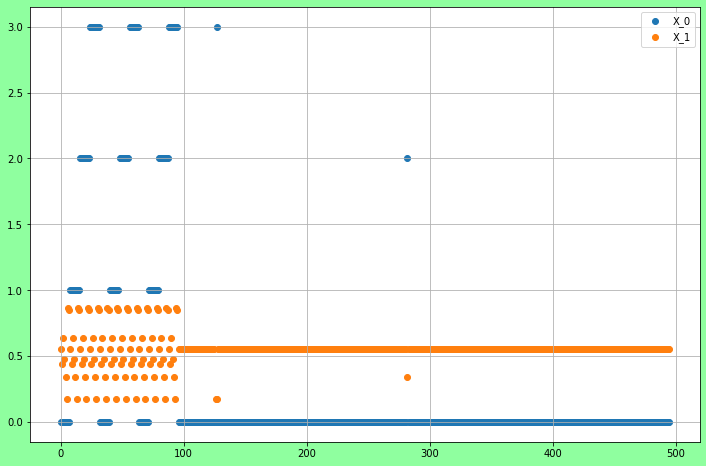

In [14]:
seed = 6

t_X = output[seed]["X_list"]

# plot_2d_X(t_X[0])
plot_2d_X(t_X[4])
plot_2d_X(t_X[10])


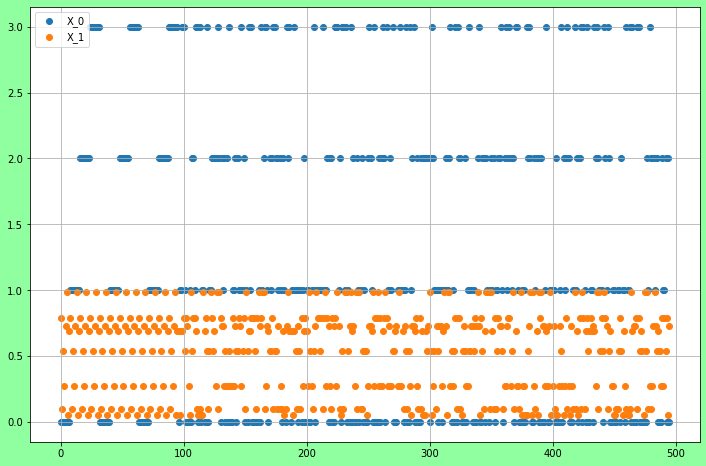

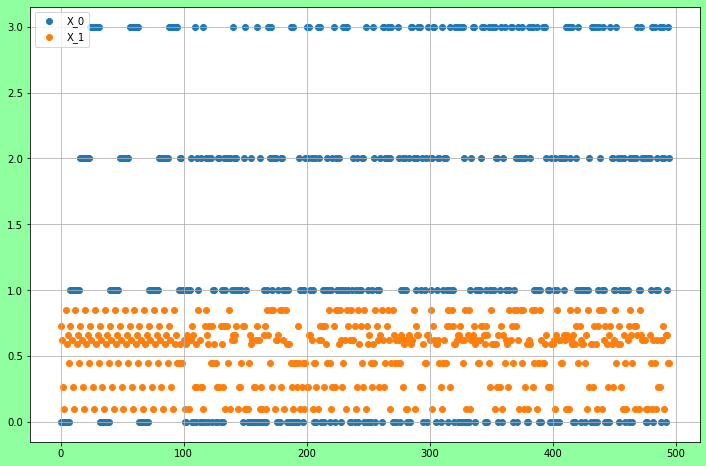

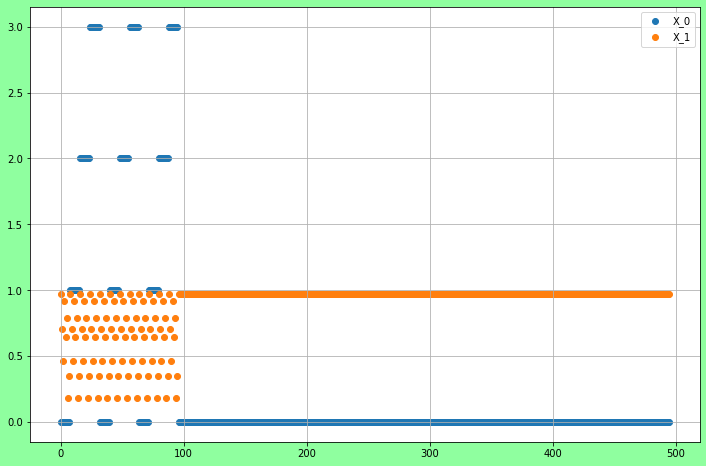

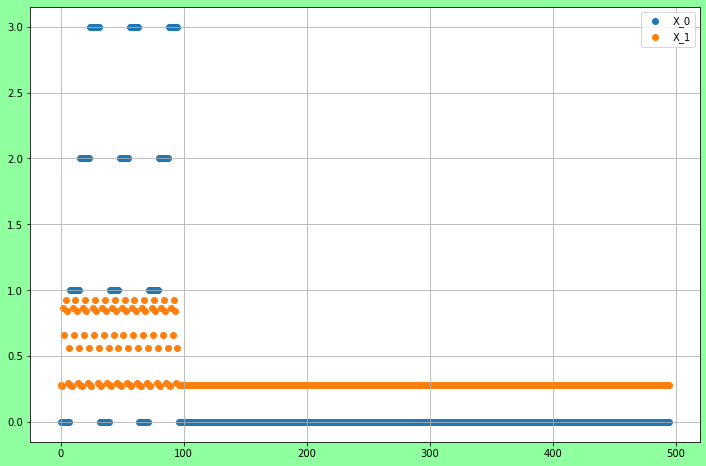

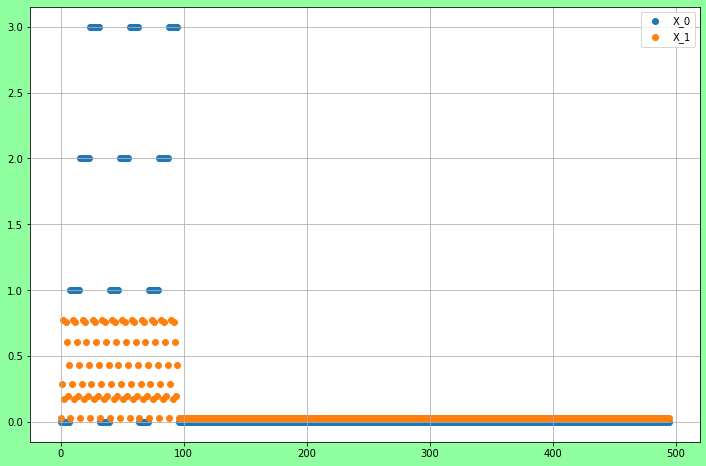

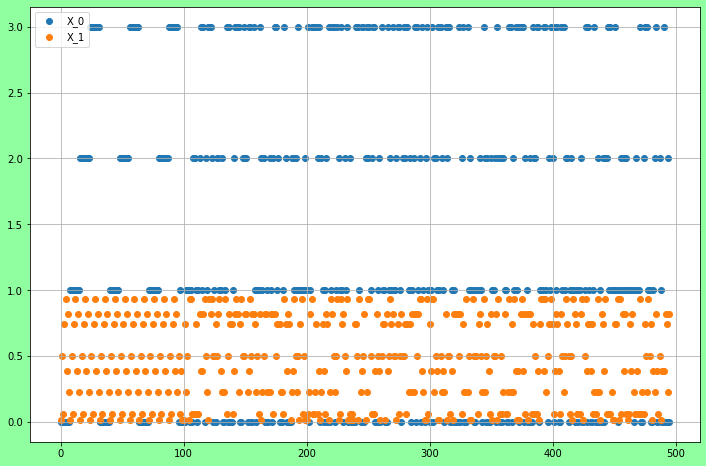

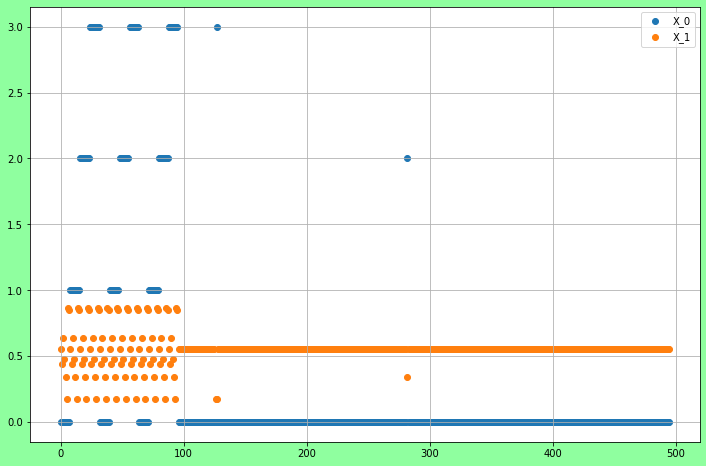

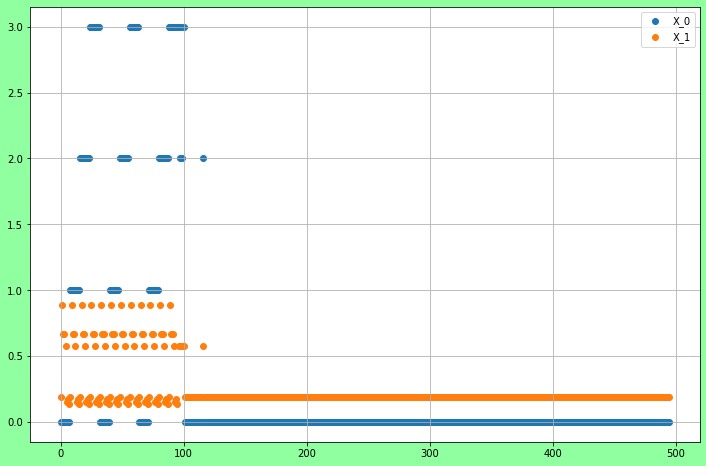

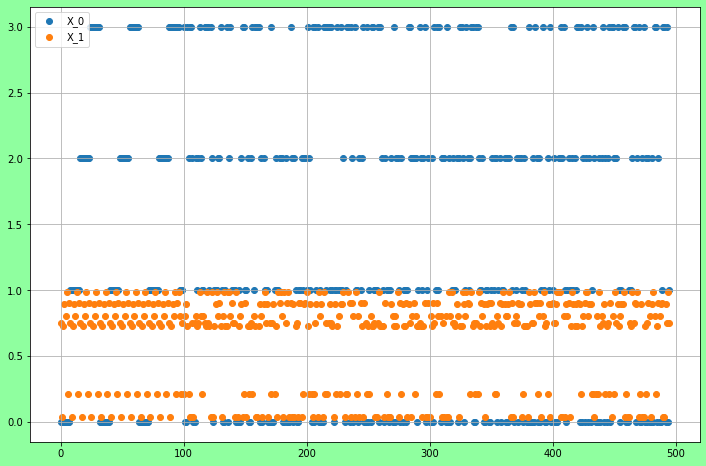

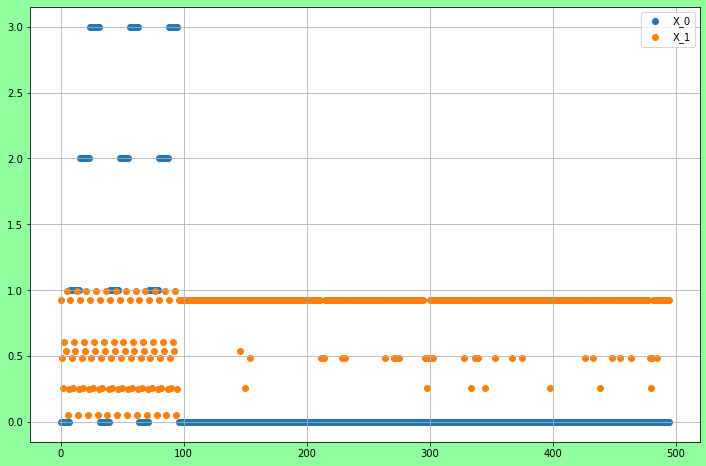

In [5]:
for seed in range(10):
    t_X = output[seed]["X_list"]
    plot_2d_X(t_X[-1])

In [6]:
# for seed in range(10):
#     t_X = output[seed]["X_list"]
#     plot_2d_X(t_X[4])
